In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
taxi_jan_2019 = pd.read_csv("data/yellow_tripdata_2019-01.csv")
taxi_data = pd.concat([taxi_jan_2019])

In [3]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


In [4]:
taxi_data.shape

(7667792, 18)

In [5]:
taxi_data.isnull().sum()
columns = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID','PULocationID', 'DOLocationID', 'payment_type', 'total_amount']
taxi_data = taxi_data[columns]


array([[<AxesSubplot:title={'center':'passenger_count'}>,
        <AxesSubplot:title={'center':'trip_distance'}>,
        <AxesSubplot:title={'center':'RatecodeID'}>],
       [<AxesSubplot:title={'center':'PULocationID'}>,
        <AxesSubplot:title={'center':'DOLocationID'}>,
        <AxesSubplot:title={'center':'payment_type'}>],
       [<AxesSubplot:title={'center':'total_amount'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

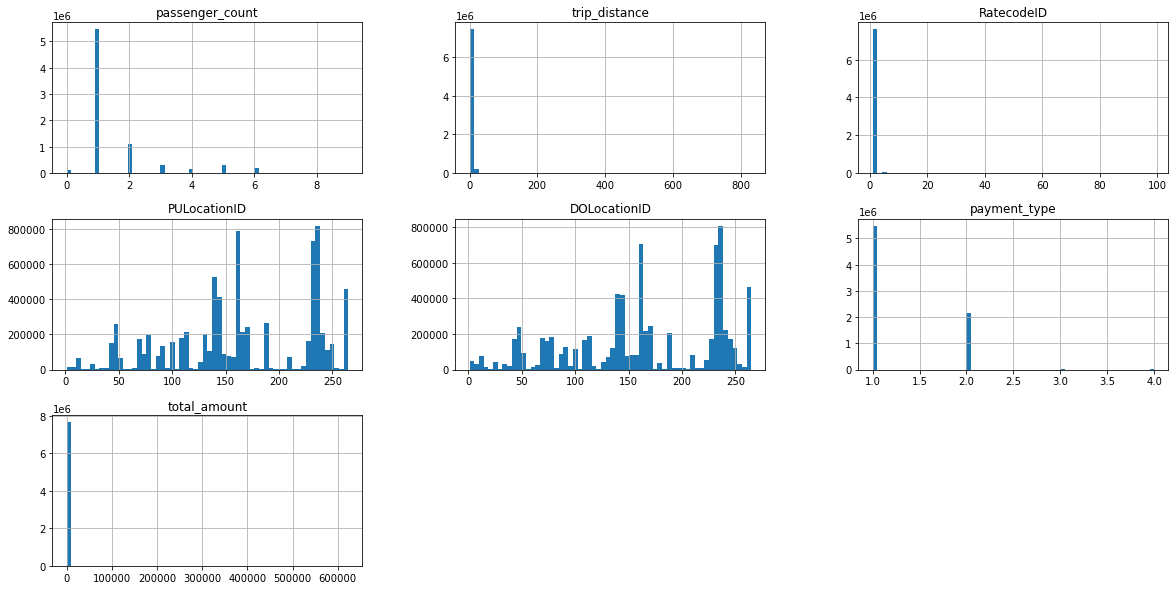

In [6]:
taxi_data.hist(bins=60, figsize=(20,10))

<AxesSubplot:xlabel='index', ylabel='total_amount'>

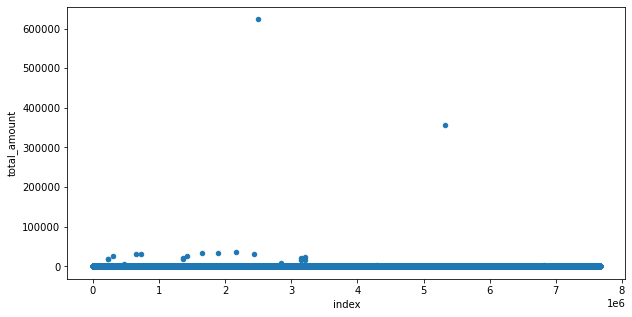

In [7]:
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

<AxesSubplot:xlabel='index', ylabel='total_amount'>

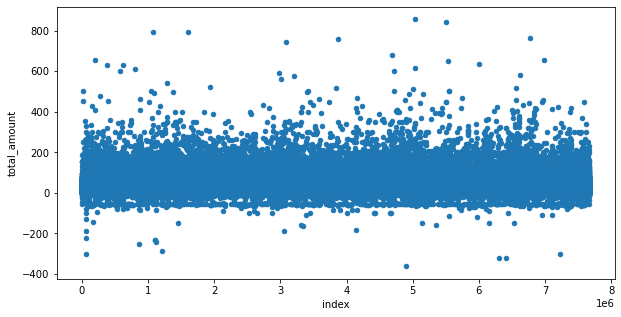

In [8]:
taxi_data[taxi_data['total_amount']<1000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

<AxesSubplot:xlabel='index', ylabel='total_amount'>

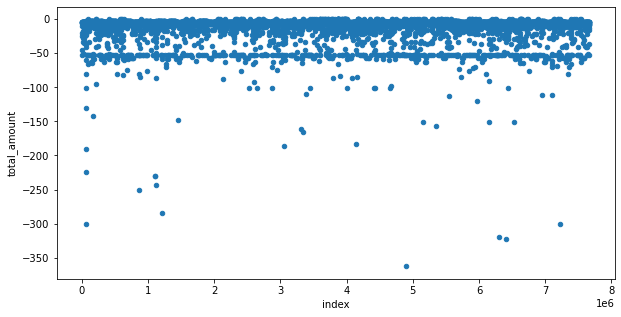

In [9]:
taxi_data[taxi_data['total_amount']<0].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [10]:
print(taxi_data[taxi_data['total_amount']<0].shape)
taxi_data[taxi_data['total_amount']<0].head()

(7131, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2,0.10,1,148,148,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1,4.13,1,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1,1.35,1,162,234,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1,0.00,1,234,234,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1,0.16,1,234,234,4,-4.3


<AxesSubplot:>

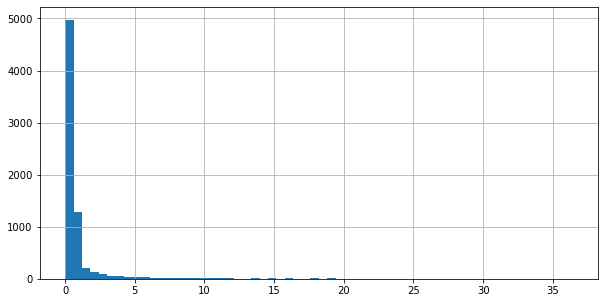

In [11]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(bins=60,figsize=(10,5))

In [12]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

0.00     1270
0.01        4
1.00        4
0.02        4
0.03        3
         ... 
17.60       1
1.20        1
1.33        1
1.75        1
3.20        1
Name: trip_distance, Length: 110, dtype: int64

In [13]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

3    4088
4    2666
2     376
1       1
Name: payment_type, dtype: int64

In [14]:
taxi_data[taxi_data['total_amount']>200].shape

(1166, 9)

In [15]:
taxi_data['total_amount'].mean()

15.68222215901336

### I agree should cut from $200 level.

In [16]:
taxi_data = taxi_data[taxi_data['total_amount']<200]

In [17]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55


In [18]:
taxi_data.shape

(7666621, 9)

In [22]:
taxi_data_filtered = taxi_data[(taxi_data['total_amount']<200)&(taxi_data['total_amount']>=0)]
taxi_data_filtered.shape

(7659490, 9)

In [23]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

In [24]:
taxi_data_prepared = taxi_data_filtered.copy()

In [25]:
taxi_data_prepared.dtypes

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
payment_type               int64
total_amount             float64
dtype: object

In [27]:
taxi_data_prepared.loc[:,'tpep_pickup_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:,'tpep_pickup_datetime'])
taxi_data_prepared.loc[:,'tpep_dropoff_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:,'tpep_dropoff_datetime'])

In [29]:
taxi_data_prepared.loc[:,'RatecodeID'] = taxi_data_prepared['RatecodeID'].astype('str')
taxi_data_prepared.loc[:,'PULocationID'] = taxi_data_prepared['PULocationID'].astype('str')
taxi_data_prepared.loc[:,'DOLocationID'] = taxi_data_prepared['DOLocationID'].astype('str')
taxi_data_prepared.loc[:,'payment_type'] = taxi_data_prepared['payment_type'].astype('str')

In [30]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [37]:
taxi_data_prepared['transaction_date'] = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)
taxi_data_prepared['transaction_year'] = taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day'] = taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hour'] = taxi_data_prepared['tpep_pickup_datetime'].dt.hour

In [32]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30,2019-01-01,2019,1,1,0
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80,2018-12-21,2018,12,21,13
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55,2018-11-28,2018,11,28,15
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55,2018-11-28,2018,11,28,15


array([[<AxesSubplot:title={'center':'tpep_pickup_datetime'}>,
        <AxesSubplot:title={'center':'tpep_dropoff_datetime'}>,
        <AxesSubplot:title={'center':'passenger_count'}>],
       [<AxesSubplot:title={'center':'trip_distance'}>,
        <AxesSubplot:title={'center':'total_amount'}>,
        <AxesSubplot:title={'center':'transaction_year'}>],
       [<AxesSubplot:title={'center':'transaction_month'}>,
        <AxesSubplot:title={'center':'transaction_day'}>,
        <AxesSubplot:title={'center':'transaction_hour'}>]], dtype=object)

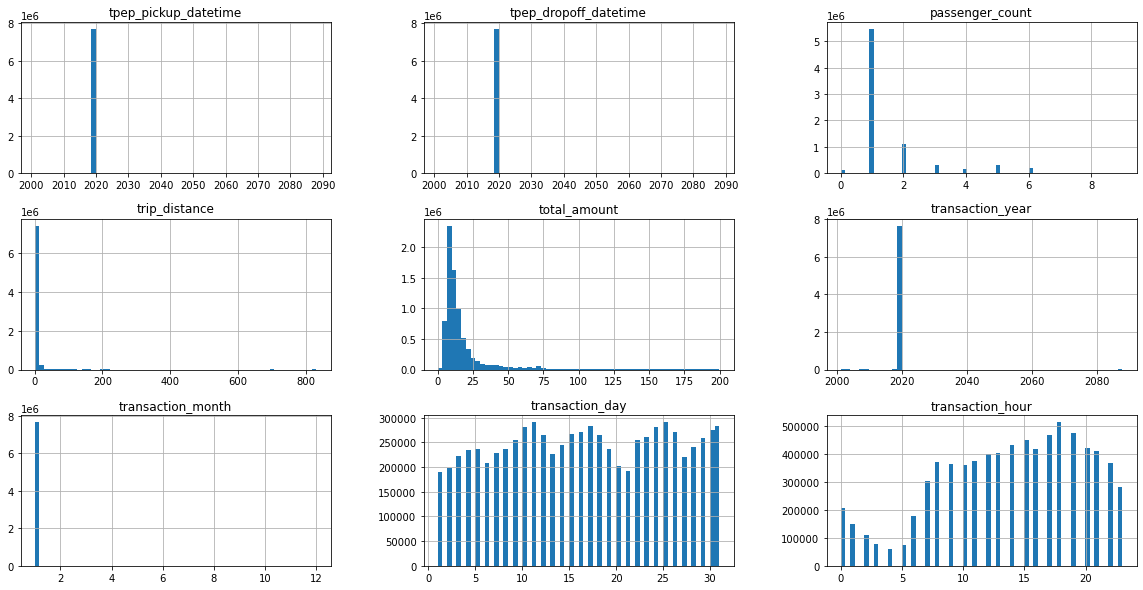

In [33]:
taxi_data_prepared.hist(bins=60, figsize=(20,10))

In [34]:
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_month']==1]
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_year']==2019]

array([[<AxesSubplot:title={'center':'tpep_pickup_datetime'}>,
        <AxesSubplot:title={'center':'tpep_dropoff_datetime'}>,
        <AxesSubplot:title={'center':'passenger_count'}>],
       [<AxesSubplot:title={'center':'trip_distance'}>,
        <AxesSubplot:title={'center':'total_amount'}>,
        <AxesSubplot:title={'center':'transaction_year'}>],
       [<AxesSubplot:title={'center':'transaction_month'}>,
        <AxesSubplot:title={'center':'transaction_day'}>,
        <AxesSubplot:title={'center':'transaction_hour'}>]], dtype=object)

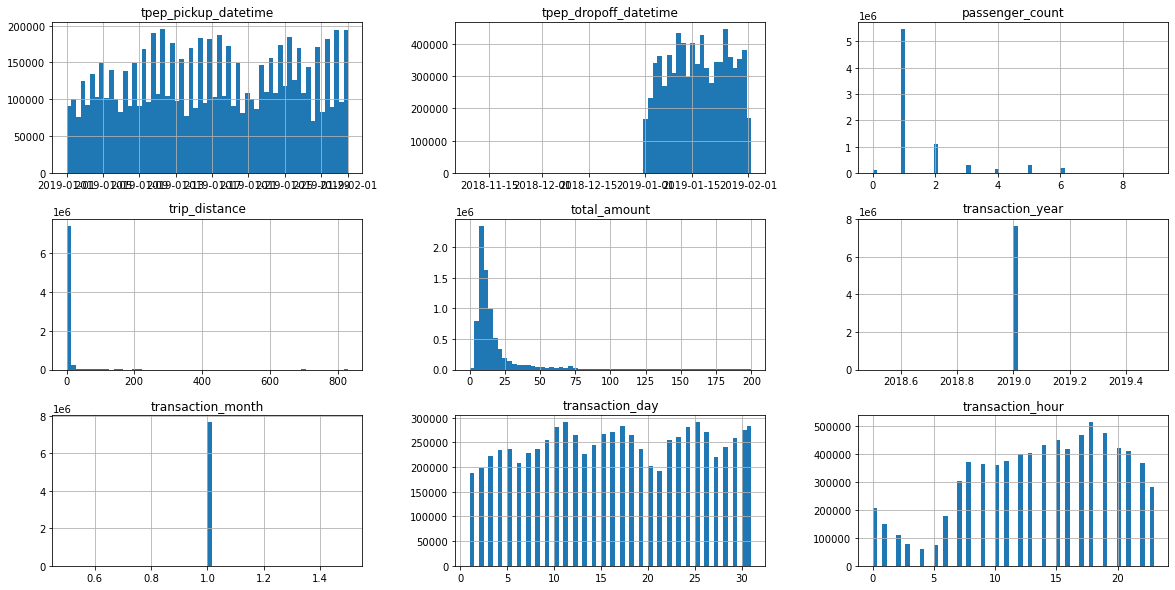

In [35]:
taxi_data_prepared.hist(bins=60, figsize=(20,10))

In [38]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
transaction_date         datetime64[ns]
transaction_year                  int64
transaction_month                 int64
transaction_day                   int64
transaction_hour                  int64
dtype: object

In [39]:
categorical_columns = ['PULocationID', 'transaction_date', 'transaction_month', 'transaction_day', 'transaction_hour']
numerical_columns = ['trip_distance', 'total_amount']
all_needed_columns = categorical_columns + numerical_columns

In [40]:
main_taxi_df = taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(7658954, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,151,2019-01-01,1,1,0,1.5,9.95
1,239,2019-01-01,1,1,0,2.6,16.30
7,163,2019-01-01,1,1,0,1.3,9.05
8,229,2019-01-01,1,1,0,3.7,18.50
9,141,2019-01-01,1,1,0,2.1,13.00


In [41]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transactions'] = main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(102556, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4
